In [10]:
from datetime import datetime
import random
random.seed(datetime.now().timestamp())
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
def random_roll():
    last_time = datetime.now().timestamp()
    while True:
        time_now = datetime.now().timestamp()
        if last_time != time_now:
            random.seed(time_now)
            last_time = time_now
        else:
            random.seed(random.random())
        yield random.random()
rnd = random_roll()

class Model:
    def __init__(self, config):
        self.config = config
        self.time = 1
        self.store = []
        self.attributes = ["demand","revenue","variable_expenses","income","taxes","profit", "investment"]
    def time_increment(self):
        self.time += 1
        demand = int(self.config.demand_from + (self.config.demand_range * next(rnd)))
        revenue = demand * self.config.price
        variable_expenses = revenue * self.config.variable_expenses_coefficient
        if self.config.amortization_timespan <= 0:
            self.config.amortization = 0
        else:
            self.config.amortization_timespan -= 1
        income = revenue - variable_expenses - self.config.invariant_expenses - self.config.amortization
        taxes = income * self.config.tax_coefficient
        profit = income - taxes - self.config.amortization
        self.config.investment += profit / (1 + self.config.discount_coefficient)**self.time
        return [
            demand,
            revenue,
            variable_expenses,
            income,
            taxes,
            profit,
            self.config.investment,
        ]
    def model(self, timespan = 10):
        for _ in range(timespan):
            #increment = self.time_increment()
            #increment.insert(0, self.time)
            self.store.append(self.time_increment())
        df = pd.DataFrame(self.store, columns=self.attributes)
        print(df)
        return df

class Object:
    def __init__(self, **attributes):
        self.__dict__.update(attributes)

In [12]:
config = Object(
    demand_from = 8,
    demand_range = 5,
    investment = -150,
    price = 44,
    variable_expenses_coefficient = 0.75,
    tax_coefficient = 0.34,
    invariant_expenses = (11+10)/2+10,
    amortization = 10,
    amortization_timespan = 4,
    discount_coefficient = 0.1,
)

model = Model(config)
df = model.model(30)

    demand  revenue  variable_expenses  income  taxes  profit  investment
0        8      352              264.0    57.5  19.55   27.95 -126.900826
1       10      440              330.0    79.5  27.03   42.47  -94.992487
2       11      484              363.0    90.5  30.77   49.73  -61.026228
3        8      352              264.0    57.5  19.55   27.95  -43.671477
4       12      528              396.0   111.5  37.91   73.59   -2.131840
5       12      528              396.0   111.5  37.91   73.59   35.631466
6        8      352              264.0    67.5  22.95   44.55   56.414369
7       11      484              363.0   100.5  34.17   66.33   84.544765
8       11      484              363.0   100.5  34.17   66.33  110.117851
9       10      440              330.0    89.5  30.43   59.07  130.821526
10       9      396              297.0    78.5  26.69   51.81  147.329788
11      11      484              363.0   100.5  34.17   66.33  166.543227
12      11      484              363.0

In [8]:
df[["profit"]].describe()

,profit
count,30.000000
mean,57.824667
std,12.081592
min,35.210000
25%,45.845000
50%,58.030000
75%,71.775000
max,73.590000


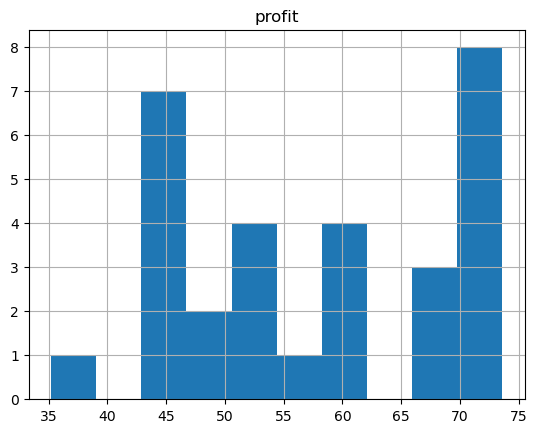

In [9]:
hist = df.hist(column="profit")